In [1]:
# Step 1: Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# To display plots inline (for Jupyter Notebook)
%matplotlib inline



In [2]:
# Step 2: Load the dataset
file_path = r"C:\Users\saifi\Documents\Student_performance\Dataset\student_scores.csv"
df = pd.read_csv(file_path)

# Display first few rows
print("Dataset Preview:")
display(df.head())

# Basic info
print("\nDataset Info:")
print(df.info())

# Summary statistics
print("\nSummary:")
print(df.describe())


Dataset Preview:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 

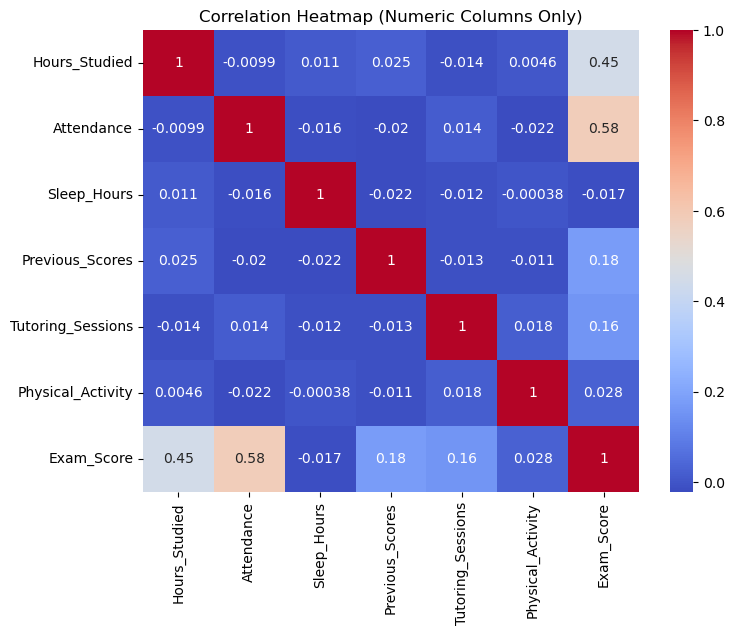

In [4]:
# Correlation heatmap (numeric columns only)
plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include=['number'])  # select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()


In [7]:
# Step 4: Feature selection
features = ['Hours_Studied', 'Sleep_Hours', 'Attendance', 'Previous_Scores', 'Motivation_Level']
target = 'Exam_Score'

X = df[features]
y = df[target]

print(X.head())
print(y.head())

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


   Hours_Studied  Sleep_Hours  Attendance  Previous_Scores Motivation_Level
0             23            7          84               73              Low
1             19            8          64               59              Low
2             24            7          98               91           Medium
3             29            8          89               98           Medium
4             19            6          92               65           Medium
0    67
1    61
2    74
3    71
4    70
Name: Exam_Score, dtype: int64
Training samples: 5285, Testing samples: 1322


In [9]:
from sklearn.preprocessing import LabelEncoder

# Copy X to avoid changing original
X_encoded = X.copy()

# Encode Motivation_Level (and any other categorical columns)
le = LabelEncoder()
X_encoded['Motivation_Level'] = le.fit_transform(X_encoded['Motivation_Level'])

# Split again using encoded features
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 5.33
R² Score: 0.62


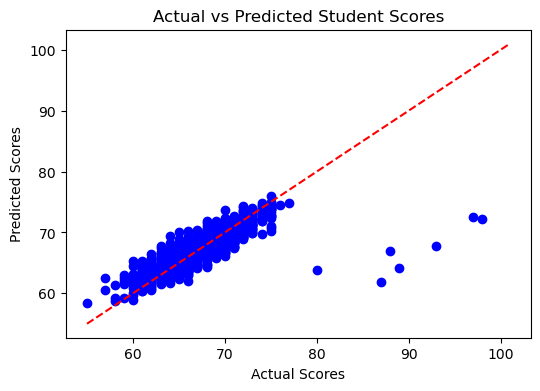

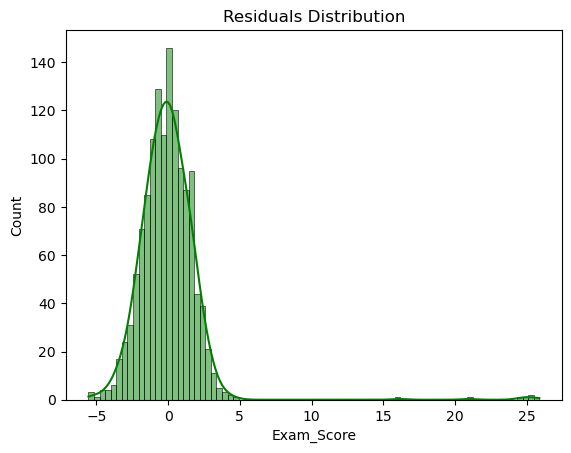

In [12]:
# Step 6: Visualize predictions

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Student Scores")
plt.show()

# Residuals distribution
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color="green")
plt.title("Residuals Distribution")
plt.show()


In [14]:
import os

# Make sure the folder exists
os.makedirs("outputs/model", exist_ok=True)

# Now save your model safely
joblib.dump(model, "outputs/model/student_score_model.joblib")
joblib.dump(features, "outputs/model/features.joblib")

print("✅ Model and features saved successfully!")


✅ Model and features saved successfully!


In [15]:
# Step 7: Save model and columns
joblib.dump(model, "outputs/model/student_score_model.joblib")

# Save feature names
joblib.dump(features, "outputs/model/features.joblib")

print("✅ Model saved successfully!")


✅ Model saved successfully!


In [17]:
## Use EXACT same feature names as during training
new_student = {
    'Hours_Studied': 5,
    'Sleep_Hours': 7,
    'Attendance': 8,
    'Previous_Scores': 70,
    'Motivation_Level': 'High'  # text value will be encoded automatically
}



In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Try different polynomial degrees
for degree in [1, 2, 3]:
    pipe = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('lr', LinearRegression())
    ])
    pipe.fit(X_train, y_train)
    y_pred_poly = pipe.predict(X_test)
    print(f"Degree {degree}: MSE = {mean_squared_error(y_test, y_pred_poly):.2f}, R² = {r2_score(y_test, y_pred_poly):.2f}")


Degree 1: MSE = 5.33, R² = 0.62
Degree 2: MSE = 5.23, R² = 0.63
Degree 3: MSE = 5.29, R² = 0.63
